<a href="https://colab.research.google.com/github/VictorGabrielCuralesvic/email-antispam-project/blob/main/email_spam_detector_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
X = df['v2']
y = df['v1']

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.sample(5)

,target,text
2507,ham,Yup...
20,ham,Is that seriously how you spell his name?
1364,ham,Hey i will be really pretty late... You want t...
3423,spam,Am new 2 club & dont fink we met yet Will B gr...
5200,spam,Call Germany for only 1 pence per minute! Call...


In [8]:
df = df.rename(columns={'v1': 'target', 'v2': 'text'})

In [6]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [10]:
print(df.head())

  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
vectorizer = CountVectorizer()

In [13]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn_classifier.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

In [16]:
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

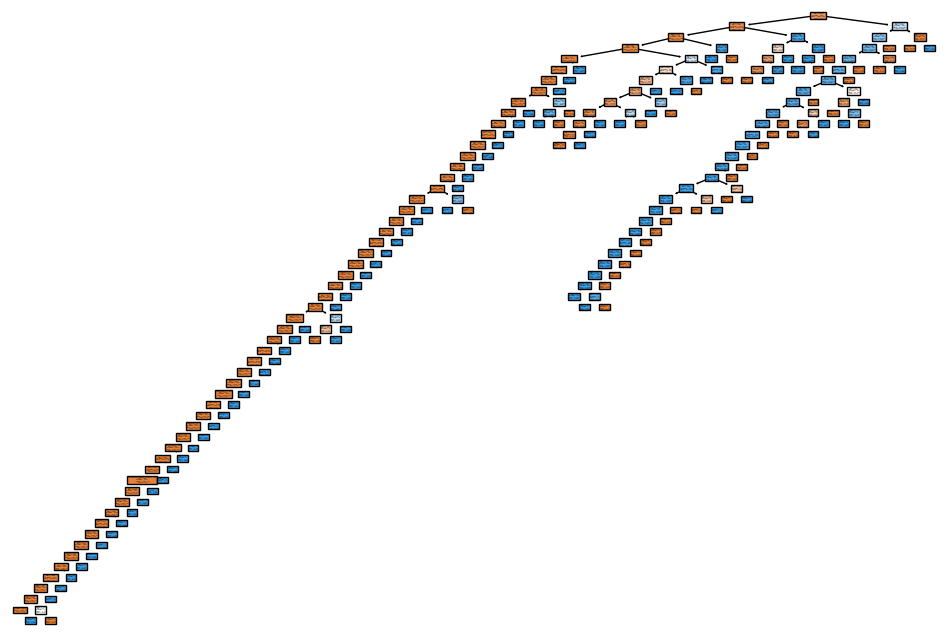

In [19]:
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_classifier, feature_names=vectorizer.get_feature_names_out(), class_names=['ham', 'spam'], filled=True)
plt.show()

In [20]:
inertia = []

In [21]:
from sklearn.cluster import KMeans

In [23]:
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_test_vectorized)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


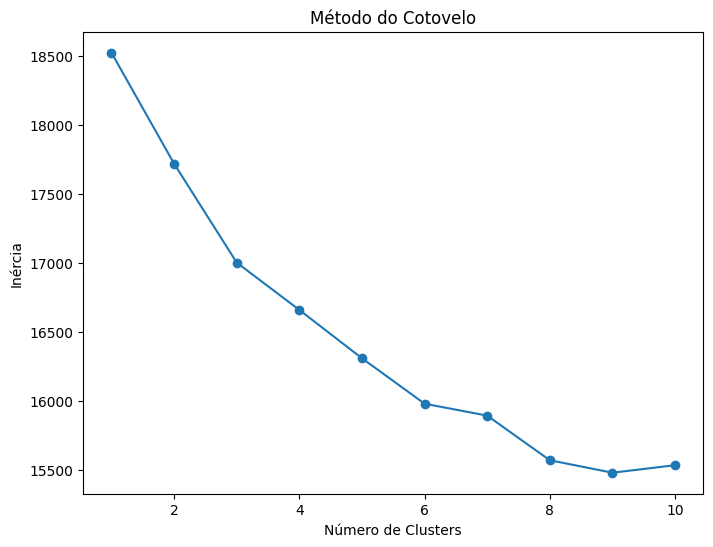

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [41]:
from sklearn.decomposition import TruncatedSVD
import seaborn as sns

In [47]:
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_test_vectorized)

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_test_vectorized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
X_test_clustered = X_test.copy()

In [52]:
X_test_clustered['cluster'] = clusters

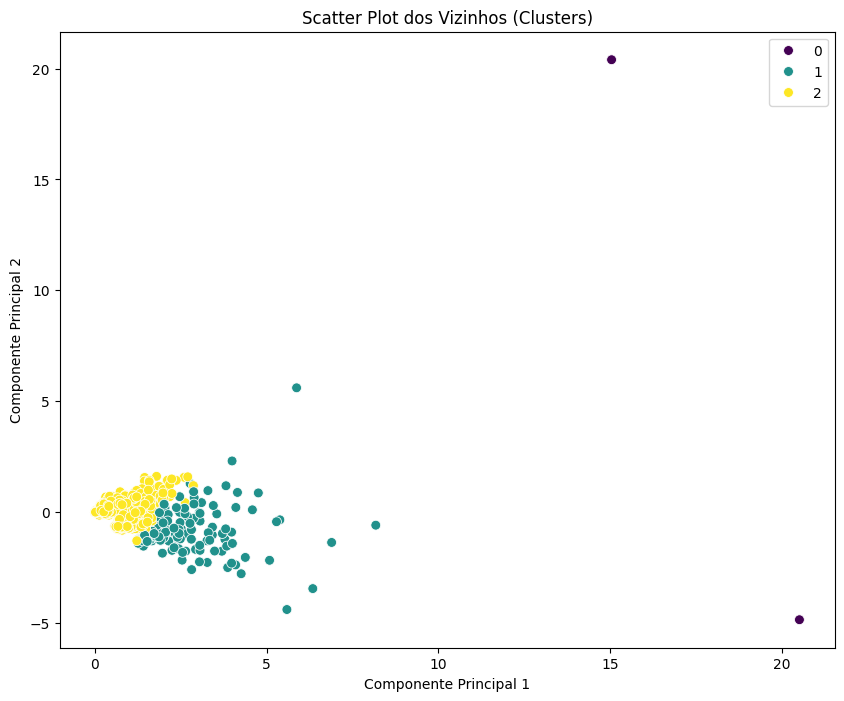

In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=X_test_clustered['cluster'], palette='viridis', s=50)
plt.title('Scatter Plot dos Vizinhos (Clusters)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [54]:
y_train_pred = knn_classifier.predict(X_train_vectorized)
y_test_pred = knn_classifier.predict(X_test_vectorized)

In [55]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [56]:
print(f'Acurácia no conjunto de treinamento: {train_accuracy}')
print(f'Acurácia no conjunto de teste: {test_accuracy}')

Acurácia no conjunto de treinamento: 0.9315683194974198
Acurácia no conjunto de teste: 0.9192825112107623


In [57]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[965   0]
 [ 90  60]]


In [58]:
class_report = classification_report(y_test, y_test_pred)
print('Relatório de Classificação:')
print(class_report)

Relatório de Classificação:
              precision    recall  f1-score   support

         ham       0.91      1.00      0.96       965
        spam       1.00      0.40      0.57       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.93      0.92      0.90      1115

